In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#reading csv files
t1_inflight_satisfaction_score=pd.read_csv("Survey data_Inflight Satisfaction Score.csv")
t2_customer_comments=pd.read_csv("Survey data _Customer comments.csv")
t3_inventory_data=pd.read_csv("Inflight Service_Inventory data.csv")
t4_pre_order_data=pd.read_csv("Inflight Service_Pre order data.csv")

In [4]:
#taking overview of t1, rows and columns
t1_inflight_satisfaction_score.shape

(47074, 31)

In [5]:
#taking overview of t1, top few rows
t1_inflight_satisfaction_score.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [7]:
#taking overview of t1, column wise synopsis
t1_inflight_satisfaction_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

In [8]:
#data cleaning part, looking values of some attribute, removing or replacing values for better analysis
t1_inflight_satisfaction_score['satisfaction_type'].unique()

array(['Dissatisfied', 'Satisfied', nan], dtype=object)

In [9]:
t1_inflight_satisfaction_score['score'].unique()

array(['2', '5', '3', '1', '4', 'chicken entrée', 'other (specify)',
       'vegetarian entrée', 'snack basket selection',
       'sandwich/burger/wrap', 'beef entrée', 'seafood entrée'],
      dtype=object)

In [11]:
#removing null valued rows for satisfsaction column
t1_inflight_satisfaction_score.dropna(subset=['satisfaction_type'], inplace=True)

In [163]:
t1_inflight_satisfaction_score['satisfaction_type'].unique()

array(['Dissatisfied', 'Satisfied'], dtype=object)

In [12]:
#checking if rows reduced?
t1_inflight_satisfaction_score.shape

(34963, 31)

In [13]:
#unrequired string values removed
t1_inflight_satisfaction_score['score'].unique()

array(['2', '5', '3', '1', '4'], dtype=object)

In [15]:
#now similar for loyalty program
t1_inflight_satisfaction_score['loyalty_program_level'].unique()

array([nan, 'premier platinum', 'non-elite', 'premier silver',
       'premier gold', 'premier 1k', 'global services', 'NBK'],
      dtype=object)

In [16]:
#removing nan
t1_inflight_satisfaction_score['loyalty_program_level'].fillna(value='non members', inplace=True)

In [17]:
t1_inflight_satisfaction_score['loyalty_program_level'].unique()

array(['non members', 'premier platinum', 'non-elite', 'premier silver',
       'premier gold', 'premier 1k', 'global services', 'NBK'],
      dtype=object)

In [19]:
t1_inflight_satisfaction_score['fleet_type_description'].unique()

array(['CRJ-200', 'ERJ-175', 'A319-100', 'ERJ-170', 'CRJ-700', 'B737-800',
       'A320-200', 'CRJ-550', 'ERJ-145', 'B737-900', 'B737-MAX9',
       'B757-200', 'B737-700', 'B767-400', 'B737-MAX8', 'B777-200',
       'B757-300', 'B767-300', 'B777-300', 'B787-10', 'B787-8', 'B787-9'],
      dtype=object)

In [21]:
#checking values of delay, assuming delay a positive quantity, we need to convert -ve ones into +ve
t1_inflight_satisfaction_score['arrival_delay_minutes'].unique()

array([ -24,   10,   -8,  -11,   18,    6,    9,  -14,   -5,   55,  -19,
        -12,  -13,   15,   46,   -2,  -22,  -27,  -23,  133,  -18,  -21,
        -15,   13,    2,  -20,   27,    3,  -30,  -16,  -17,  -29,   -3,
        -40,   11,   73,   74,    1,  -31,   -9,  237,   -4,  112,    4,
         23,   -7,   -1,   70,   78,  135,   32,   38,  -10,   59,  -33,
         19,   12,   16,  -26,   24,   14,    8,   90,  231,  -25,  234,
        -32,  -28,  -37,   31,   54,    5,   29,   26,   65,   -6,    7,
         61,   22,  173,   36,    0,   67,   25,   41,  -35,  142,  190,
         20,   42,  -36,   60,  -43,  -34,   58,   21,  151,  129,  128,
         28,   17,  140,  177,  132,   35,  147,   39,  -38,  217,  155,
         37,  -45,   77,  -51,  -39,   49,   89,   96,  172,   53,   47,
         51,  122,   81,   79,   83,  127,   57,   33,   34,   50,  -52,
         63,  138,  136,   44,   48,   87,  242,  187,   84,  113,   64,
        108,   68,  110,  144,   69,  102,   66,  3

In [25]:
#checking datatype, its integer, gotta convert to integer
t1_inflight_satisfaction_score['arrival_delay_minutes'].dtype

dtype('int64')

In [27]:
#converting to string, applying strip operation to remove -
t1_inflight_satisfaction_score['arrival_delay_minutes'] = t1_inflight_satisfaction_score['arrival_delay_minutes'].astype(str)
t1_inflight_satisfaction_score['arrival_delay_minutes'] =t1_inflight_satisfaction_score['arrival_delay_minutes'].str.strip("-")

In [29]:
#converting back to integer
t1_inflight_satisfaction_score['arrival_delay_minutes'] = t1_inflight_satisfaction_score['arrival_delay_minutes'].astype(int)
t1_inflight_satisfaction_score['arrival_delay_minutes'].unique()

array([ 24,  10,   8,  11,  18,   6,   9,  14,   5,  55,  19,  12,  13,
        15,  46,   2,  22,  27,  23, 133,  21,  20,   3,  30,  16,  17,
        29,  40,  73,  74,   1,  31, 237,   4, 112,   7,  70,  78, 135,
        32,  38,  59,  33,  26,  90, 231,  25, 234,  28,  37,  54,  65,
        61, 173,  36,   0,  67,  41,  35, 142, 190,  42,  60,  43,  34,
        58, 151, 129, 128, 140, 177, 132, 147,  39, 217, 155,  45,  77,
        51,  49,  89,  96, 172,  53,  47, 122,  81,  79,  83, 127,  57,
        50,  52,  63, 138, 136,  44,  48,  87, 242, 187,  84, 113,  64,
       108,  68, 110, 144,  69, 102,  66, 396, 163,  91, 207,  56, 103,
       107, 111, 433, 164, 146, 174, 139, 907,  86,  75,  88, 125, 159,
        76,  94,  72,  99, 115,  62, 166, 168, 121,  93,  71,  80,  97,
       779, 105, 208, 120, 117, 327, 233, 185, 106, 202, 124, 215, 179,
       162, 280, 109, 134, 161,  82, 182, 104, 197,  85,  95, 321, 101,
        92, 126, 169, 145, 220, 114, 880, 116, 279, 338, 167, 17

In [31]:
#score dtype is object, converting to integer
t1_inflight_satisfaction_score['score'] = t1_inflight_satisfaction_score['score'].astype(int)

In [33]:
#some other checking unique values
t1_inflight_satisfaction_score['generation'].unique()

array(['Gen X', 'Boomer', 'Silent', 'Gen Z', 'Millennial', 'Greatest',
       'NBK'], dtype=object)

In [34]:
t1_inflight_satisfaction_score['hub_spoke'].unique()

array(['spoke departure', 'hub departure'], dtype=object)

In [172]:
#calculating %inflight satisfaction=satisfied count/ total count*100
value_counts = t1_inflight_satisfaction_score['satisfaction_type'].value_counts()
value_counts_df = pd.DataFrame(value_counts)
value_counts_df.reset_index(inplace=True)
value_counts_df.columns = ['satisfaction_type', 'count']
value_counts_df


,satisfaction_type,count
0,Dissatisfied,22353
1,Satisfied,12610


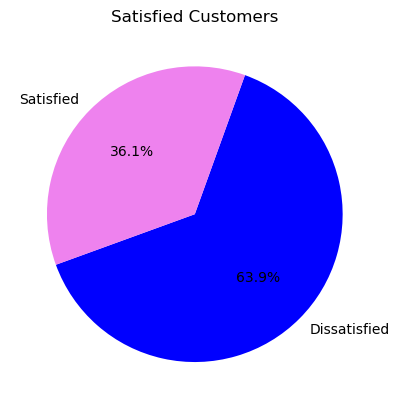

In [186]:
plt.pie(value_counts_df['count'], labels=value_counts_df['satisfaction_type'], autopct='%1.1f%%', startangle=200, colors=['blue','violet'])
plt.title('Satisfied Customers')
plt.show()

In [37]:
#satisfcation score
inflight_satisfaction=(value_counts[1]/(value_counts[0]+value_counts[1]))*100
inflight_satisfaction

36.06669908188657

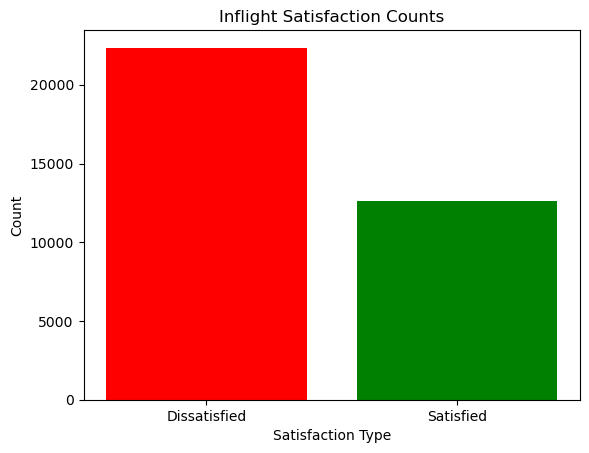

In [174]:
satisfaction_types = ['Dissatisfied', 'Satisfied']
counts = [22353, 12610]

colors = ['green' if count <= 15000 else 'red' for count in counts]

plt.bar(satisfaction_types, counts, color=colors)
plt.xlabel('Satisfaction Type')
plt.ylabel('Count')
plt.title('Inflight Satisfaction Counts')
plt.show()



In [38]:
#thats too low, now we look into various differentiable factors, where satisfaction rate is low compared to others


In [39]:
#lets see if date wise there is drop, to check sth might have happened in recent?
daily_avg = t1_inflight_satisfaction_score.groupby('scheduled_departure_date')['score'].mean()
daily_avg

scheduled_departure_date
9/1/2022     2.843297
9/10/2022    2.933921
9/11/2022    2.758709
9/12/2022    2.789655
9/13/2022    2.992586
9/14/2022    2.850555
9/15/2022    2.876376
9/16/2022    2.842609
9/17/2022    2.833938
9/18/2022    2.788673
9/19/2022    2.821429
9/2/2022     2.894468
9/20/2022    2.881667
9/21/2022    2.885563
9/22/2022    2.887011
9/23/2022    2.833607
9/24/2022    2.914092
9/25/2022    2.809480
9/26/2022    2.847660
9/27/2022    2.951510
9/28/2022    2.874302
9/29/2022    2.818942
9/3/2022     2.983580
9/30/2022    2.964578
9/4/2022     2.969352
9/5/2022     2.861185
9/6/2022     2.884398
9/7/2022     2.904721
9/8/2022     2.890078
9/9/2022     2.900931
Name: score, dtype: float64

<Axes: xlabel='scheduled_departure_date'>

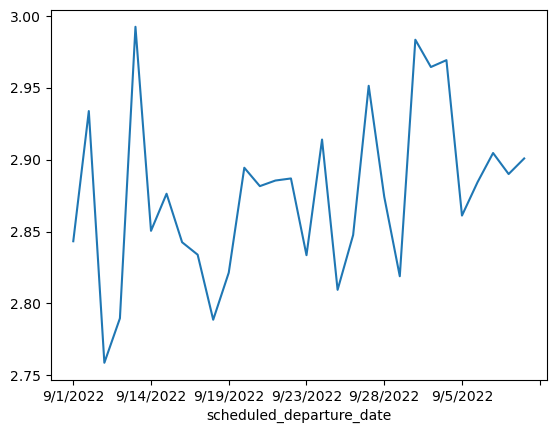

In [188]:
#plotting for better visualtion
daily_avg.plot()

In [42]:
#it was increasing in middle months then dipped too low and same suite follows
#lets see if date wise, satisfaction rate has differed for hub & spoke
#first creating pivot table, where on index we have date and on column heading we have hub or spoke and its avg
pivot_df = t1_inflight_satisfaction_score.pivot_table(index='scheduled_departure_date', columns=['hub_spoke'], values='score')
pivot_df

hub_spoke,hub departure,spoke departure
scheduled_departure_date,,
9/1/2022,2.856000,2.826722
9/10/2022,2.995683,2.869565
9/11/2022,2.747619,2.771481
9/12/2022,2.820679,2.754159
9/13/2022,2.930818,3.060554
9/14/2022,2.879870,2.818018
9/15/2022,2.885113,2.866785
9/16/2022,2.871355,2.813051
9/17/2022,2.844023,2.823954


<Axes: xlabel='scheduled_departure_date'>

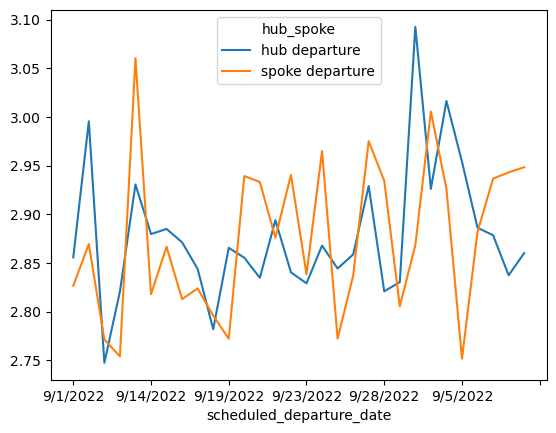

In [43]:
#plotting to understand better
pivot_df.plot()

In [202]:
#better taking average as whole of each, grouping by each and taking mean of both
d = t1_inflight_satisfaction_score.groupby('hub_spoke')['score'].mean()
d_df = pd.DataFrame(d)
d_df.reset_index(inplace=True)
d_df.columns = ['hub_spoke', 'avg']
d_df

,hub_spoke,avg
0,hub departure,2.877664
1,spoke departure,2.874317


In [ ]:
#not major difference, hub slightly better


In [46]:
#date wise graph for various generations
pivot_df2 = t1_inflight_satisfaction_score.pivot_table(index='scheduled_departure_date', columns=['generation'], values='score', aggfunc='mean')
pivot_df2

generation,Boomer,Gen X,Gen Z,Greatest,Millennial,NBK,Silent
scheduled_departure_date,,,,,,,
9/1/2022,2.907563,2.827128,3.375000,1.0,2.528302,NaN,2.961538
9/10/2022,2.950845,3.004556,3.115385,NaN,2.661202,NaN,2.984127
9/11/2022,2.724335,2.820639,2.741935,NaN,2.778443,NaN,2.543478
9/12/2022,2.736138,2.818681,3.193548,NaN,2.691892,NaN,3.192982
9/13/2022,2.968000,3.062305,3.034483,NaN,2.850932,NaN,3.179487
9/14/2022,2.876923,2.714286,3.307692,NaN,2.947020,NaN,3.013889
9/15/2022,2.888316,2.841398,3.000000,NaN,2.870504,3.0,2.935484
9/16/2022,2.879612,2.814714,2.772727,NaN,2.802139,NaN,2.847458
9/17/2022,2.800000,2.864989,2.862069,NaN,2.840659,NaN,2.929577


<Axes: xlabel='scheduled_departure_date'>

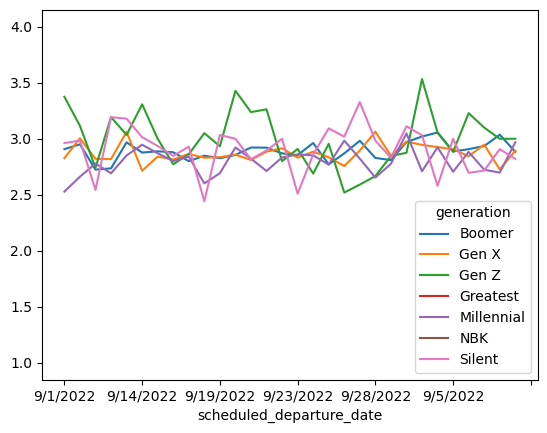

In [47]:
#lineplot
pivot_df2.plot()

In [203]:
#taking average as whole, generation wise to see if particular is most unsatisfied
d2 = t1_inflight_satisfaction_score.groupby('generation')['score'].mean().sort_values()
d2_df = pd.DataFrame(d2)
d2_df.reset_index(inplace=True)
d2_df.columns = ['generation', 'avg']
d2_df

,generation,avg
0,Greatest,1.000000
1,NBK,2.666667
2,Millennial,2.800562
3,Gen X,2.870671
4,Boomer,2.892283
5,Silent,2.913966
6,Gen Z,3.009674


(array([1.1088e+04, 1.6367e+04, 0.0000e+00, 1.6970e+03, 0.0000e+00,
        8.2700e+02, 4.9790e+03, 0.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

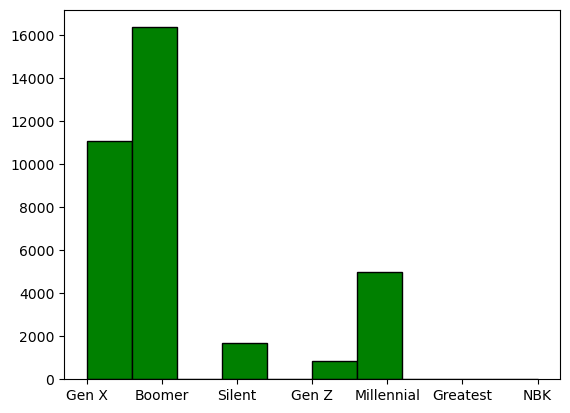

In [190]:
#greatest and NBK least travelled, and they are least satisfied[1]
plt.hist(t1_inflight_satisfaction_score['generation'], edgecolor='black', color=['green'])

<Axes: xlabel='scheduled_departure_date'>

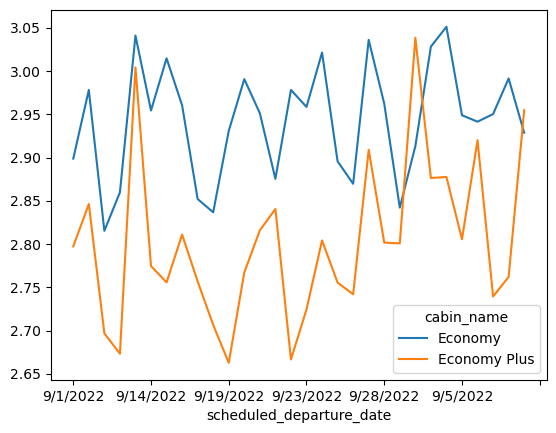

In [53]:
#lets check satisfaction for cabin, economy vs economy plus
pivot_df3 = t1_inflight_satisfaction_score.pivot_table(index='scheduled_departure_date', columns=['cabin_name'], values='score', aggfunc='mean')
pivot_df3.plot()

In [204]:
#numeric average analysis[2]
avg = t1_inflight_satisfaction_score.groupby('cabin_name')['score'].mean()
avg_df = pd.DataFrame(avg)
avg_df.reset_index(inplace=True)
avg_df.columns = ['cabin_name', 'avg']
avg_df
#clearly economy plus people arent satisfied much as compared to economy

,cabin_name,avg
0,Economy,2.941685
1,Economy Plus,2.799340


In [56]:
#checking for fleet
t1_inflight_satisfaction_score['fleet_usage'].unique()

array(['Express', 'Mainline'], dtype=object)

In [205]:
#clearly mainline people are less satisfied as compared express fleet[3]
avg2 = t1_inflight_satisfaction_score.groupby('fleet_usage')['score'].mean()
avg2_df = pd.DataFrame(avg2)
avg2_df.reset_index(inplace=True)
avg2_df.columns = ['fleet', 'avg']
avg2_df

,fleet,avg
0,Express,2.95368
1,Mainline,2.86283


<Axes: xlabel='fleet_usage'>

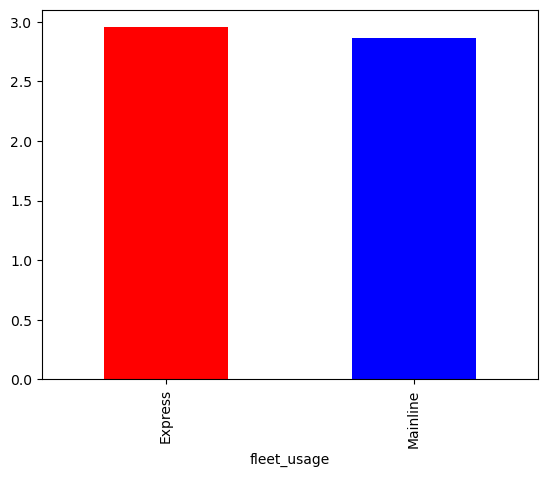

In [214]:
avg2.plot(kind='bar', color=['red','blue'])

<Axes: xlabel='scheduled_departure_date'>

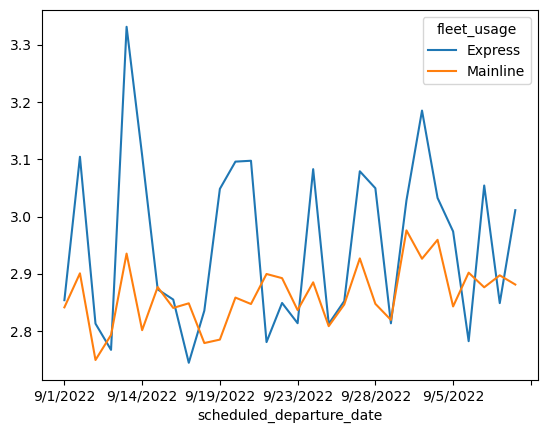

In [59]:
#visualising the same
pivot_df4 = t1_inflight_satisfaction_score.pivot_table(index='scheduled_departure_date', columns=['fleet_usage'], values='score', aggfunc='mean')
pivot_df4.plot()

In [201]:
#looking loyalty program wise in both fleet type
avg4 = t1_inflight_satisfaction_score.groupby(['fleet_usage','loyalty_program_level'])['score'].mean()
avg4_df = pd.DataFrame(avg4)
avg4_df.reset_index(inplace=True)
avg4_df.columns = ['fleet_usage', 'loyalty_program_level','avg']
avg4_df
#people more satisfied in express if we were to see fleet wise with their loyalty programs [4]
#but some loyaly program like global services,premier platinum, gold

,fleet_usage,loyalty_program_level,avg
0,Express,NBK,3.000000
1,Express,global services,2.508197
2,Express,non members,3.095583
3,Express,non-elite,2.946547
4,Express,premier 1k,2.746736
5,Express,premier gold,2.816720
6,Express,premier platinum,2.780591
7,Express,premier silver,2.932059
8,Mainline,NBK,2.500000
9,Mainline,global services,2.606719


In [206]:
#even delay of express is less compared to mainline
avg7 = t1_inflight_satisfaction_score.groupby('fleet_usage')['arrival_delay_minutes'].mean()
avg7
avg7_df = pd.DataFrame(avg7)
avg7_df.reset_index(inplace=True)
avg7_df.columns = ['fleet_usage','avg']
avg7_df
#people

,fleet_usage,avg
0,Express,19.439647
1,Mainline,21.171220


<Axes: xlabel='fleet_usage'>

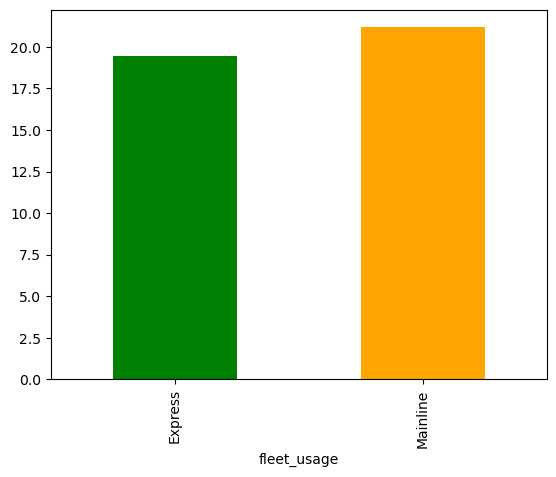

In [213]:
avg7.plot(kind='bar',color=['green','orange'])

In [207]:
#haul type analysis
avg8 = t1_inflight_satisfaction_score.groupby('haul_type')['score'].mean().sort_values()
avg8
avg8_df = pd.DataFrame(avg8)
avg8_df.reset_index(inplace=True)
avg8_df.columns = ['haul','avg']
avg8_df

#people
#long one seems unsatisfied[5]

,haul,avg
0,Long,2.693955
1,Short,2.884323
2,Medium,2.958464


<Axes: xlabel='haul_type'>

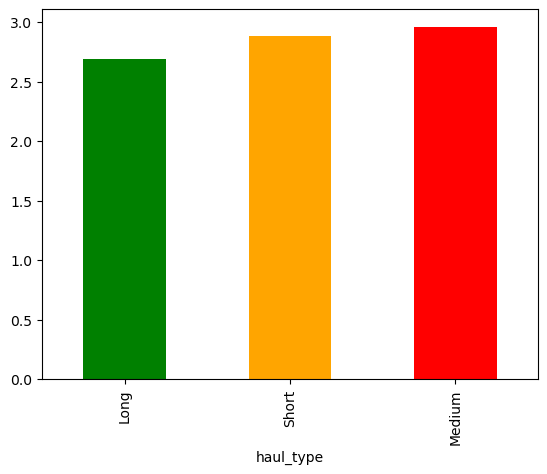

In [211]:
avg8.plot(kind='bar', color=['green','orange','red'])

In [67]:
#conclusions till now
# [0] satisfcation rate is very low, 36.06669908188657
# [1] greatest and NBK least travelled, and they are least satisfied
# [2] economy plus people arent satisfied much as compared to economy
# [3] mainline people are less satisfied as compared express fleet, and their fleet is slow too
# [4] people more satisfied in express if we were to see fleet wise with their loyalty programs, 
#     but some loyaly program like global services,premier platinum, gold needs push
# [5] haul type analysis, long one most unsatisfied

In [68]:
#now working on 4th table,preorder table, since that has food category and other data, we can test our hypothesis,
#which food in which segemntation isnt performing good

In [69]:
t4_pre_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   flight_number            212039 non-null  int64 
 1   departure_station_code   212039 non-null  object
 2   arrival_station_code     212039 non-null  object
 3   record_locator           212039 non-null  object
 4   carrier_code             212039 non-null  object
 5   scheduled_departure_dtl  212039 non-null  object
 6   cabin_code               212039 non-null  object
 7   meal_group               191728 non-null  object
 8   meal_category            191728 non-null  object
 9   meal_short_description   212039 non-null  object
 10  meal_description         137062 non-null  object
 11  is_entree                191728 non-null  object
 12  pre_order_qty            212039 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 21.0+ MB


In [70]:
#checking various values, if nan exists, to remove
t4_pre_order_data['meal_group'].unique()

array(['ENTREES HOT', 'UNITED CATERER OWNED 88-3F', 'ENTREES COLD',
       'BEER', 'SANDWICHES', 'LIQUOR', 'ALCOHOL BEVERAGES', nan],
      dtype=object)

In [71]:
t4_pre_order_data['meal_category'].unique()

array(['POULTRY', 'BREAKFAST', 'VEGETARIAN', 'SNACKS', 'BEEF/VEAL',
       'CHEESE', 'PASTA', 'SEAFOOD', 'BEER', 'SANDWICH', 'LIQUOR',
       'GENERIC INT WINE A', nan, 'VEGETABLE', 'PORK', 'DINNER',
       'VARIETY', 'LAMB'], dtype=object)

In [73]:
#both have nan, we aim to remove nan, o that for each value we can work on summarisation
t4_pre_order_data.dropna(subset=['meal_group','meal_category'], inplace=True)
t4_pre_order_data.info()
#nan removed, non null count reduced

<class 'pandas.core.frame.DataFrame'>
Index: 191728 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   flight_number            191728 non-null  int64 
 1   departure_station_code   191728 non-null  object
 2   arrival_station_code     191728 non-null  object
 3   record_locator           191728 non-null  object
 4   carrier_code             191728 non-null  object
 5   scheduled_departure_dtl  191728 non-null  object
 6   cabin_code               191728 non-null  object
 7   meal_group               191728 non-null  object
 8   meal_category            191728 non-null  object
 9   meal_short_description   191728 non-null  object
 10  meal_description         137062 non-null  object
 11  is_entree                191728 non-null  object
 12  pre_order_qty            191728 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 20.5+ MB


In [74]:
#quantity values
t4_pre_order_data['pre_order_qty'].unique()


array([ 1,  2,  4,  3, 18,  7,  5,  8,  6, 14, 21,  9, 12, 10, 28, 13, 11,
       17, 15, 32, 16, 20, 24, 22, 19, 44], dtype=int64)

In [75]:
#checking if nan removed?
t4_pre_order_data['meal_group'].unique()
t4_pre_order_data['meal_category'].unique()

array(['POULTRY', 'BREAKFAST', 'VEGETARIAN', 'SNACKS', 'BEEF/VEAL',
       'CHEESE', 'PASTA', 'SEAFOOD', 'BEER', 'SANDWICH', 'LIQUOR',
       'GENERIC INT WINE A', 'VEGETABLE', 'PORK', 'DINNER', 'VARIETY',
       'LAMB'], dtype=object)

In [76]:
t4_pre_order_data['cabin_code']

0         J
1         J
2         J
3         J
4         J
         ..
212033    Y
212034    Y
212036    Y
212037    Y
212038    J
Name: cabin_code, Length: 191728, dtype: object

In [78]:
#replacing j for business, y for economy in cabin code
t4_pre_order_data['cabin_code'] = t4_pre_order_data['cabin_code'].str.replace('J', 'Business').str.replace('Y', 'Economy')

In [79]:
t4_pre_order_data['cabin_code']

0         Business
1         Business
2         Business
3         Business
4         Business
            ...   
212033     Economy
212034     Economy
212036     Economy
212037     Economy
212038    Business
Name: cabin_code, Length: 191728, dtype: object

In [80]:
#first table's cabin_code_desc' is same as cabin_code of table 4, so renaming

t1_inflight_satisfaction_score.rename(columns={'cabin_code_desc': 'cabin_code'}, inplace=True)

In [82]:
t4_pre_order_data[['flight_number','record_locator']]

,flight_number,record_locator
0,1423,B3XX1H
1,1620,BFXXJC
2,1852,DPXX2H
3,548,ELXX8H
4,1155,NCXX4S
...,...,...
212033,1759,CPXXXQ
212034,2189,PDXXCY
212036,1498,O3XX7J
212037,1830,BQXXYW


In [83]:
t4_pre_order_data.reset_index(inplace=True)

In [84]:
t4_pre_order_data[['flight_number','record_locator']]

,flight_number,record_locator
0,1423,B3XX1H
1,1620,BFXXJC
2,1852,DPXX2H
3,548,ELXX8H
4,1155,NCXX4S
...,...,...
191723,1759,CPXXXQ
191724,2189,PDXXCY
191725,1498,O3XX7J
191726,1830,BQXXYW


In [87]:
x=t4_pre_order_data[['flight_number','record_locator']]

In [89]:
x.drop_duplicates()
x

,flight_number,record_locator
0,1423,B3XX1H
1,1620,BFXXJC
2,1852,DPXX2H
3,548,ELXX8H
4,1155,NCXX4S
...,...,...
191723,1759,CPXXXQ
191724,2189,PDXXCY
191725,1498,O3XX7J
191726,1830,BQXXYW


In [90]:
#theoretically, in each flight each pnr should be sufficient for our case
#now we will merge t1 and t4, to check satisfaction for orders

In [94]:
t4_pre_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191728 entries, 0 to 191727
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   index                    191728 non-null  int64 
 1   flight_number            191728 non-null  int64 
 2   departure_station_code   191728 non-null  object
 3   arrival_station_code     191728 non-null  object
 4   record_locator           191728 non-null  object
 5   carrier_code             191728 non-null  object
 6   scheduled_departure_dtl  191728 non-null  object
 7   cabin_code               191728 non-null  object
 8   meal_group               191728 non-null  object
 9   meal_category            191728 non-null  object
 10  meal_short_description   191728 non-null  object
 11  meal_description         137062 non-null  object
 12  is_entree                191728 non-null  object
 13  pre_order_qty            191728 non-null  int64 
dtypes: int64(3), object(

In [95]:
new_column_names = {'scheduled_departure_dtl': 'scheduled_departure_date', 'departure_station_code': 'origin_station_code','arrival_station_code':'destination_station_code',}
t4_pre_order_data.rename(columns=new_column_names, inplace=True)

In [96]:
t1_merge_t4=t1_inflight_satisfaction_score.merge(t4_pre_order_data,on=['flight_number','record_locator','scheduled_departure_date','origin_station_code','destination_station_code'],how='inner')

In [97]:
t1_merge_t4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     2897 non-null   int64 
 1   origin_station_code               2897 non-null   object
 2   destination_station_code          2897 non-null   object
 3   record_locator                    2897 non-null   object
 4   scheduled_departure_date          2897 non-null   object
 5   question_text                     2897 non-null   object
 6   score                             2897 non-null   int32 
 7   satisfaction_type                 2897 non-null   object
 8   driver_sub_group1                 2897 non-null   object
 9   driver_sub_group2                 2897 non-null   object
 10  arrival_delay_minutes             2897 non-null   int32 
 11  arrival_delay_group               2897 non-null   object
 12  cabin_code_x        

In [98]:
#as people who preorder are less, hence goes for this joint table entries
#now checking attribute wise stats


In [218]:
#overall summarise mean, category/group wise
x=t1_merge_t4.groupby('meal_group')['score'].mean()
x
#SANDWICHES NOT PERFORMING WELL, ENTREES COLD TOO[10]

meal_group
ALCOHOL BEVERAGES             3.028571
BEER                          3.230769
ENTREES COLD                  2.444444
ENTREES HOT                   3.222129
LIQUOR                        3.020000
SANDWICHES                    2.000000
UNITED CATERER OWNED 88-3F    2.905914
Name: score, dtype: float64

In [103]:
y=t1_merge_t4.groupby('meal_category')['score'].mean()
y
#VARIETY, SANWHICH, PASTA, CHEESE are poor performers
#DINNER, BREAKFAST, POULTRY, VEGETRAION GOOD SELLING


meal_category
BEEF/VEAL             3.013921
BEER                  3.230769
BREAKFAST             3.672222
CHEESE                2.562500
DINNER                5.000000
GENERIC INT WINE A    3.028571
LIQUOR                3.020000
PASTA                 2.680000
PORK                  4.333333
POULTRY               2.912306
SANDWICH              2.000000
SEAFOOD               3.000000
SNACKS                2.905914
VARIETY               1.500000
VEGETARIAN            3.215447
Name: score, dtype: float64

<Axes: xlabel='meal_group'>

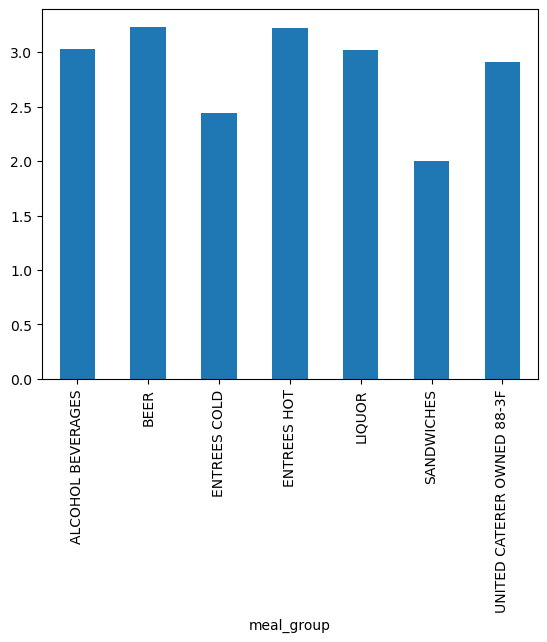

In [222]:
#lets see more, in terms of plots
x.plot(kind='bar')

<Axes: xlabel='meal_category'>

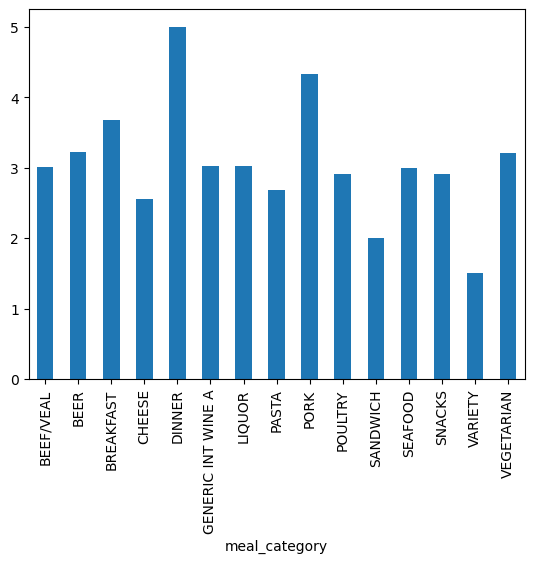

In [107]:
y.plot(kind='bar')

In [111]:
#Segment wise comparison of food: meal group vs hub, spoke
pivot_df1 = t1_merge_t4.pivot_table(index='meal_group', columns='hub_spoke', values='score', aggfunc='mean')
pivot_df1
#[B] BEER, LIQUOR,SANWHICHES PERFORMING POOR IN SPOKE
#ENTREES COLD ARE PERFORMING POOR IN BOTH, WITH MAJOR DIP IN HUB

hub_spoke,hub departure,spoke departure
meal_group,,
ALCOHOL BEVERAGES,3.034483,3.000000
BEER,3.291667,2.500000
ENTREES COLD,2.000000,2.470588
ENTREES HOT,3.325806,3.031953
LIQUOR,3.225000,2.200000
SANDWICHES,NaN,2.000000
UNITED CATERER OWNED 88-3F,3.025316,2.696296


In [112]:
#now meal category vs hub, spoke
pivot_df2 = t1_merge_t4.pivot_table(index='meal_category', columns='hub_spoke', values='score', aggfunc='mean')
pivot_df2
#[C] BEEF, BEER, LIQUOR, PASTA, SANDWHICH, VARIETY PERFORMING POOR IN SPOKE
#    VARIETY, SEA FOOD POOR IN HUB

hub_spoke,hub departure,spoke departure
meal_category,,
BEEF/VEAL,3.016279,2.000000
BEER,3.291667,2.500000
BREAKFAST,3.716763,3.557214
CHEESE,NaN,2.562500
DINNER,5.000000,NaN
GENERIC INT WINE A,3.034483,3.000000
LIQUOR,3.225000,2.200000
PASTA,4.000000,2.500000
PORK,NaN,4.333333


In [114]:
#INTERNATIONAL VS DOMESTIC
pivot_df3 = t1_merge_t4.pivot_table(index='meal_group', columns='international_domestic_indicator', values='score', aggfunc='mean')
pivot_df3
#[D] entrees cold performing poor in domestic, kind of refrigration issue
#    Sanwhich poor in international, entrees cold


international_domestic_indicator,Domestic,International
meal_group,,
ALCOHOL BEVERAGES,2.870968,4.250000
BEER,3.125000,4.500000
ENTREES COLD,2.562500,1.500000
ENTREES HOT,3.213340,3.288256
LIQUOR,2.906977,3.714286
SANDWICHES,NaN,2.000000
UNITED CATERER OWNED 88-3F,2.884615,3.117647


In [115]:
pivot_df4 = t1_merge_t4.pivot_table(index='meal_category', columns='international_domestic_indicator', values='score', aggfunc='mean')
pivot_df4
#[E] Pasta,SANWHICH, VARIETY perfoming poor in international
# Domestic: pasta, cheese

international_domestic_indicator,Domestic,International
meal_category,,
BEEF/VEAL,3.027363,2.827586
BEER,3.125000,4.500000
BREAKFAST,3.720325,3.390476
CHEESE,2.562500,NaN
DINNER,NaN,5.000000
GENERIC INT WINE A,2.870968,4.250000
LIQUOR,2.906977,3.714286
PASTA,2.736842,2.500000
PORK,NaN,4.333333


In [123]:
#Cabin Wise
pivot_df5 = t1_merge_t4.pivot_table(index='meal_group', columns='cabin_code_y', values='score', aggfunc='mean')
pivot_df5
#similar pattern

cabin_code_y,Business,Economy
meal_group,,
ALCOHOL BEVERAGES,NaN,3.028571
BEER,NaN,3.230769
ENTREES COLD,2.444444,NaN
ENTREES HOT,3.222129,NaN
LIQUOR,NaN,3.020000
SANDWICHES,2.000000,NaN
UNITED CATERER OWNED 88-3F,NaN,2.905914


In [118]:
t1_merge_t4['fleet_usage'].unique()

array(['Mainline'], dtype=object)

In [120]:
pivot_df = t1_merge_t4.pivot_table(index='meal_group', columns='loyalty_program_level', values='score', aggfunc='mean')
pivot_df
# Global servives look very dis satisfied.

loyalty_program_level,global services,non members,non-elite,premier 1k,premier gold,premier platinum,premier silver
meal_group,,,,,,,
ALCOHOL BEVERAGES,NaN,3.500000,2.916667,2.400000,3.000000,5.000000,3.600000
BEER,NaN,2.333333,3.538462,2.800000,3.000000,2.000000,4.000000
ENTREES COLD,2.000000,3.000000,2.166667,5.000000,NaN,2.666667,2.000000
ENTREES HOT,2.672414,3.147410,3.287926,3.255892,3.106122,2.950000,3.405634
LIQUOR,2.000000,3.000000,3.285714,2.937500,2.000000,NaN,3.000000
SANDWICHES,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
UNITED CATERER OWNED 88-3F,2.666667,2.857143,3.041667,2.727273,2.954545,3.222222,2.775000


In [125]:
pivot_df = t1_merge_t4.pivot_table(index='meal_group', columns='haul_type', values='score', aggfunc='mean')
pivot_df
# Alcholol, entrees cold, sandwhich in long, refrigration.
# Medium hall seems to do fine

haul_type,Long,Medium
meal_group,,
ALCOHOL BEVERAGES,1.500000,3.225806
BEER,3.250000,3.227273
ENTREES COLD,1.500000,2.562500
ENTREES HOT,2.853659,3.235192
LIQUOR,3.200000,3.000000
SANDWICHES,2.000000,NaN
UNITED CATERER OWNED 88-3F,2.357143,2.950581


In [122]:
#Conclusive Points
# [a] Overall sandwhich and entrees cold not performing well, they need serious improvement
#    In Category, Variety, Sandwich, Pasta and Cheese poor performers
# [b] Hub Wise: Group Beer, Liquor,Sanwhiches, Entrees Cold performing poor in spoke
#                     Entrees Cold performing poor in hub
#               Category:Beer , Beef, Liquor, Pasta, Sandwhich In Spoke
#                   Variety, Sea Food In Hub

# [c] International vs Domestic: entrees cold performing poor in domestic
#                                Sanwhich poor in international, entrees cold

# [d]                  Category: Domestic: pasta, cheese
#                                Pasta,SANWHICH, VARIETY perfoming poor in international
# [e]  Global servives look very dis satisfied.
# data preorder only for mainline
# [f]  HAUL:Alcholol, entrees cold, sandwhich in long, refrigration.
#           Medium hall seems to do fine, snce long one were most unsatisfied, alcohol etc could be reason
#      Cheese, Pasta In medium
#      Generic Wine in long, breakfast, pasta, snacks, variety, seafood, long has most o things wrong in long

                


In [124]:
pivot_df = t1_merge_t4.pivot_table(index='meal_group', columns='haul_type', values='score', aggfunc='mean')
pivot_df
# Alcholol, entrees cold, sandwhich in long, refrigration.
# Medium hall seems to do fine

haul_type,Long,Medium
meal_group,,
ALCOHOL BEVERAGES,1.500000,3.225806
BEER,3.250000,3.227273
ENTREES COLD,1.500000,2.562500
ENTREES HOT,2.853659,3.235192
LIQUOR,3.200000,3.000000
SANDWICHES,2.000000,NaN
UNITED CATERER OWNED 88-3F,2.357143,2.950581


In [126]:
pivot_df = t1_merge_t4.pivot_table(index='meal_category', columns='haul_type', values='score', aggfunc='mean')
pivot_df
# Cheese, Pasta In medium
# Generic Wine in long, breakfast, pasta, snacks, variety, seafood, long has most o things wrong in long

haul_type,Long,Medium
meal_category,,
BEEF/VEAL,3.307692,3.004785
BEER,3.250000,3.227273
BREAKFAST,2.166667,3.684874
CHEESE,NaN,2.562500
DINNER,5.000000,NaN
GENERIC INT WINE A,1.500000,3.225806
LIQUOR,3.200000,3.000000
PASTA,2.500000,2.736842
PORK,4.333333,NaN


In [127]:
t3_inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61267 non-null  int64 
 1   departure_station_code   61267 non-null  object
 2   arrival_station_code     61267 non-null  object
 3   scheduled_departure_dtl  61267 non-null  object
 4   entree_product_id        61267 non-null  int64 
 5   entree_description       61267 non-null  object
 6   entree_code              61267 non-null  object
 7   planned_entree_count     61267 non-null  int64 
 8   consumed_entree_count    61267 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.2+ MB


In [128]:
#removing 0 planned ones,assuming these are in 
t3_inventory_data=t3_inventory_data[t3_inventory_data['planned_entree_count']!=0]

In [129]:
t3_inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61253 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61253 non-null  int64 
 1   departure_station_code   61253 non-null  object
 2   arrival_station_code     61253 non-null  object
 3   scheduled_departure_dtl  61253 non-null  object
 4   entree_product_id        61253 non-null  int64 
 5   entree_description       61253 non-null  object
 6   entree_code              61253 non-null  object
 7   planned_entree_count     61253 non-null  int64 
 8   consumed_entree_count    61253 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.7+ MB


In [131]:
t3_inventory_data['utilisation %'] = (t3_inventory_data['consumed_entree_count'] / t3_inventory_data['planned_entree_count']) * 100

In [132]:
t3_inventory_data.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count,utilisation %
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32,160.000000
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0,0.000000
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7,77.777778
3,1712,SFX,CLX,9/4/2022,58764,Mediterranean Falafel Bowl,V,1,0,0.000000
4,1225,LAX,HNX,9/8/2022,60549,Vegetarian chili and polenta cake,V,1,0,0.000000


In [133]:
t3_inventory_data.groupby(['flight_number','departure_station_code','arrival_station_code','scheduled_departure_dtl'])['utilisation %'].mean()

flight_number  departure_station_code  arrival_station_code  scheduled_departure_dtl
23             DUX                     EWX                   9/20/2022                   25.000000
24             EWX                     DUX                   9/17/2022                   25.000000
                                                             9/3/2022                     0.000000
26             LHX                     BOX                   9/11/2022                   14.285714
137            NGX                     GUX                   9/12/2022                  100.000000
                                                                                           ...    
6369           IAX                     JAX                   9/20/2022                    0.000000
6375           IAX                     DCX                   9/19/2022                   71.428571
                                                             9/2/2022                    68.571429
                        

In [134]:
# Custom function to categorize utilisation
def categorize_utilisation(utilization):
    if utilization > 100:
        return 'High Demand'
    elif utilization < 80:
        return 'Poor Demand'
    else:
        return 'Optimum'

# Apply the custom function to create the 'category' column
t3_inventory_data['category'] = t3_inventory_data['utilisation %'].apply(categorize_utilisation)

In [135]:
t3_inventory_data.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count,utilisation %,category
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32,160.000000,High Demand
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0,0.000000,Poor Demand
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7,77.777778,Poor Demand
3,1712,SFX,CLX,9/4/2022,58764,Mediterranean Falafel Bowl,V,1,0,0.000000,Poor Demand
4,1225,LAX,HNX,9/8/2022,60549,Vegetarian chili and polenta cake,V,1,0,0.000000,Poor Demand


In [224]:
#products in high demand
m=t3_inventory_data[t3_inventory_data['utilisation %']>100].groupby('entree_product_id')['utilisation %'].mean()
m
m_df = pd.DataFrame(m)
m_df.reset_index(inplace=True)
m_df.columns = ['entree_product_id','utilisation %']
m_df

,entree_product_id,utilisation %
0,40980,122.222222
1,40985,115.000000
2,41564,160.000000
3,44184,146.666667
4,44234,200.000000
5,50950,130.769231
6,53014,133.333333
7,53277,133.928571
8,53291,157.812500
9,54076,123.750000


In [225]:
#products in low demand
o=t3_inventory_data[t3_inventory_data['utilisation %']<60].groupby('entree_product_id')['utilisation %'].mean()
o_df = pd.DataFrame(o)
o_df.reset_index(inplace=True)
o_df.columns = ['entree_product_id','utilisation %']
o_df

,entree_product_id,utilisation %
0,15533,0.000000
1,15594,0.000000
2,15600,0.000000
3,17185,5.769231
4,17189,0.000000
...,...,...
164,62010,0.000000
165,62011,0.000000
166,62016,0.000000
167,62023,0.000000


In [139]:
t3_inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61253 entries, 0 to 61266
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_number            61253 non-null  int64  
 1   departure_station_code   61253 non-null  object 
 2   arrival_station_code     61253 non-null  object 
 3   scheduled_departure_dtl  61253 non-null  object 
 4   entree_product_id        61253 non-null  int64  
 5   entree_description       61253 non-null  object 
 6   entree_code              61253 non-null  object 
 7   planned_entree_count     61253 non-null  int64  
 8   consumed_entree_count    61253 non-null  int64  
 9   utilisation %            61253 non-null  float64
 10  category                 61253 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 5.6+ MB


In [140]:
col={'departure_station_code':'origin_station_code','arrival_station_code':'destination_station_code','scheduled_departure_dtl':'scheduled_departure_date'}
t3_inventory_data.rename(columns=col,inplace='True')

In [141]:
t3_inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61253 entries, 0 to 61266
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flight_number             61253 non-null  int64  
 1   origin_station_code       61253 non-null  object 
 2   destination_station_code  61253 non-null  object 
 3   scheduled_departure_date  61253 non-null  object 
 4   entree_product_id         61253 non-null  int64  
 5   entree_description        61253 non-null  object 
 6   entree_code               61253 non-null  object 
 7   planned_entree_count      61253 non-null  int64  
 8   consumed_entree_count     61253 non-null  int64  
 9   utilisation %             61253 non-null  float64
 10  category                  61253 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 5.6+ MB


In [142]:
t1_merge_t3=t1_inflight_satisfaction_score.merge(t3_inventory_data,on=['flight_number','scheduled_departure_date','origin_station_code','destination_station_code'],how='inner')

In [143]:
t1_merge_t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25115 entries, 0 to 25114
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flight_number                     25115 non-null  int64  
 1   origin_station_code               25115 non-null  object 
 2   destination_station_code          25115 non-null  object 
 3   record_locator                    25115 non-null  object 
 4   scheduled_departure_date          25115 non-null  object 
 5   question_text                     25115 non-null  object 
 6   score                             25115 non-null  int32  
 7   satisfaction_type                 25115 non-null  object 
 8   driver_sub_group1                 25115 non-null  object 
 9   driver_sub_group2                 25115 non-null  object 
 10  arrival_delay_minutes             25115 non-null  int32  
 11  arrival_delay_group               25115 non-null  object 
 12  cabi

In [145]:
pivot_df10 = t1_merge_t3.pivot_table(index='hub_spoke', columns='category', values='utilisation %', aggfunc='mean')
pivot_df10

category,High Demand,Optimum,Poor Demand
hub_spoke,,,
hub departure,151.173745,96.046563,14.953491
spoke departure,121.080413,94.546406,21.881693


In [151]:
demand_counts = t1_merge_t3.groupby(['hub_spoke', 'category']).size().unstack()
demand_counts

category,High Demand,Optimum,Poor Demand
hub_spoke,,,
hub departure,216,4397,13768
spoke departure,137,2117,4480


In [158]:
demand_counts = t1_merge_t3.groupby(['international_domestic_indicator', 'category']).size().unstack()
demand_counts

category,High Demand,Optimum,Poor Demand
international_domestic_indicator,,,
Domestic,280,5762,16238
International,73,752,2010


demand_counts = t1_merge_t3.groupby(['haul_type','category']).size().unstack()
demand_counts

In [159]:
demand_counts = t1_merge_t3.groupby(['haul_type', 'category']).size().unstack()
demand_counts

category,High Demand,Optimum,Poor Demand
haul_type,,,
Long,15,349,338
Medium,338,6165,17910


In [234]:
#poor demand and international
filtered_rows = t1_merge_t3[(t1_merge_t3['international_domestic_indicator'] == 'International') & (t1_merge_t3['category'] == 'Poor Demand')]
selected_product_ids = filtered_rows['entree_product_id']
selected_product_ids_df = pd.DataFrame({'entree_product_id': selected_product_ids})
selected_product_ids_df.reset_index(inplace=True)
selected_product_ids_df.drop(columns='index',inplace=True)
selected_product_ids_df

,entree_product_id
0,60987
1,60983
2,58110
3,58109
4,58110
...,...
2005,58981
2006,60987
2007,60983
2008,58019


In [235]:
#poor demand and domestic
filtered_rows = t1_merge_t3[(t1_merge_t3['international_domestic_indicator'] == 'Domestic') & (t1_merge_t3['category'] == 'Poor Demand')]
selected_product_ids = filtered_rows['entree_product_id']
selected_product_ids_df = pd.DataFrame({'entree_product_id': selected_product_ids})
selected_product_ids_df.reset_index(inplace=True)
selected_product_ids_df.drop(columns='index',inplace=True)
selected_product_ids_df

,entree_product_id
0,58764
1,61530
2,61529
3,58981
4,58019
...,...
16233,60987
16234,60458
16235,58676
16236,57751


In [237]:
#poor demand and hub
filtered_rows = t1_merge_t3[(t1_merge_t3['hub_spoke'] == 'hub departure') & (t1_merge_t3['category'] == 'Poor Demand')]
selected_product_ids = filtered_rows['entree_product_id']
selected_product_ids_df = pd.DataFrame({'entree_product_id': selected_product_ids})
selected_product_ids_df.reset_index(inplace=True)
selected_product_ids_df.drop(columns='index',inplace=True)
selected_product_ids_df

,entree_product_id
0,58764
1,61530
2,61529
3,60987
4,60983
...,...
13763,60983
13764,60987
13765,58676
13766,57751


In [238]:
#poor demand and spoke
filtered_rows = t1_merge_t3[(t1_merge_t3['hub_spoke'] == 'spoke departure') & (t1_merge_t3['category'] == 'Poor Demand')]
selected_product_ids = filtered_rows['entree_product_id']
selected_product_ids_df = pd.DataFrame({'entree_product_id': selected_product_ids})
selected_product_ids_df.reset_index(inplace=True)
selected_product_ids_df.drop(columns='index',inplace=True)
selected_product_ids_df

,entree_product_id
0,58110
1,58109
2,58110
3,61529
4,61530
...,...
4475,58019
4476,58981
4477,61475
4478,54076
